## Homework 3, Problem 2 on homogeneous Poisson processes

ECE C143A/C243A, Spring Quarter 2022, Prof. J.C. Kao, TAs T. Monsoor, W. Yu.


## Background

The goal of this notebook is to model a neuron as a homogeneous Poisson processes and evaluate its properties. We will consider a simulated neuron that has a cosine tuning curve described in equation (1.15) in *TN* (*TN* refers to *Theoretical Neuroscience* by Dayan and Abbott.)

$$\lambda(s) = r_0 + (r_\text{max} - r_0)\cos(s-s_\text{max})$$

where $\lambda$ is the firing rate (in spikes per second), $s$ is the reaching angle of the arm, $s_\text{max}$ is the reaching angle associated with the maximum response $r_\text{max}$, and $r_0$ is an offset that shifts the tuning curve up from the zero axis.  This will be refered as tuning equation in the following questions.

Let $r_0=35$, $r_\text{max}=60$, and $s_\text{max}=\pi/2$.

Note: If you are not as familiar with Python, be aware that if 1 is of type `int`, then 1 / a where a is any `int` greater than 1 will return 0, rather than a real number between 0 and 1.  This is because Python will return an `int` if both inputs are `int`s.  If instead you write 1.0 / a, you will get out the desired output, since 1.0 is of type `float`.

In [1]:
"""
ECE C143/C243 Homework-3 Problem-2

"""
import numpy as np
import matplotlib.pyplot as plt
import nsp as nsp # these are helper functions that we provide.
import scipy.special

# Load matplotlib images inline
%matplotlib inline

# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2

### (a) (6 points) Spike trains
For each of the following reaching condition ($s=k \cdot \pi/4$, where $k = 0,1,\ldots,7$), generate 100 spike trains  according to a homogeneous Poisson process. Each spike train should have a duration of 1 second.  You can think of each of each spike train sequence as a trial.  Therefore, we generate 100 trials of the neuron spiking according to a homogeneous Poisson Process for 8 reach directions.
  
Your code for this section should populate a 2D `numpy` array, `spike_times` which has dimensions `num_cons` $\times$ `num_trials` (i.e., it is $8 \times 100$).  Each element of this 2D numpy array is a numpy array containing the spike times for the neuron on a given condition and trial.  Note that this array may have a different length for each trial.

e.g., `spike_times.shape` should return `(8, 100)` and
`spike_times[0,0]` should return the spike times on the first trial for a reach to the target at $0$ degrees.  In one instantiation, our code returns that `spike_times[0,0]` is:

`array([   0.        ,    5.94436383,   10.85691999,   26.07821145,
         50.02836141,   67.417219  ,   74.2948356 ,  119.19210112,
        139.41789878,  176.59511596,  244.40788916,  267.3643421 ,
        288.42590046,  324.3770265 ,  340.26911602,  407.75730065,
        460.76250631,  471.23773964,  489.41659607,  514.60180131,
        548.71822693,  565.6036432 ,  586.20557118,  601.11595447,
        710.37485206,  751.60837895,  879.93536952,  931.26983289,
        944.1130483 ,  949.38455374,  963.22509374,  964.67365483,
        966.3865719 ,  974.3657882 ,  987.25729081])`
        
Of course, this varies based off of random seed. Also note that time at 0 is not a spike.

In [6]:
## 2a
bin_width = 20                             # (ms)
s = np.arange(8)*np.pi/4                   # (radians)
num_cons = np.size(s)                       # num_cons = 8 in this case, number of directions
r_0 = 35 # (spikes/s)
r_max = 60 # (spikes/s)
s_max = np.pi/2 # (radians)
T = 1000 #trial length (ms)
num_trials = 100 # number of spike trains to generate

tuning = r_0 + (r_max-r_0)*np.cos(s-s_max) # tuning curve
spike_times = np.empty((num_cons, num_trials), dtype=list)

for con in range(num_cons):
    
    for rep in range(num_trials):
        #====================================================#
        # YOUR CODE HERE:
        #   Generate homogeneous Poisson process spike trains.
        #   You should populate the np.ndarray 'spike_times' according
        #   to the above description.
        #====================================================#
        Lambda=r_0+(r_max-r_0)*np.cos(s[con]-s_max)
        spike_times[con, rep] = nsp.GeneratePoissonSpikeTrain(T,Lambda)
        #====================================================#
        # END YOUR CODE
        #====================================================#

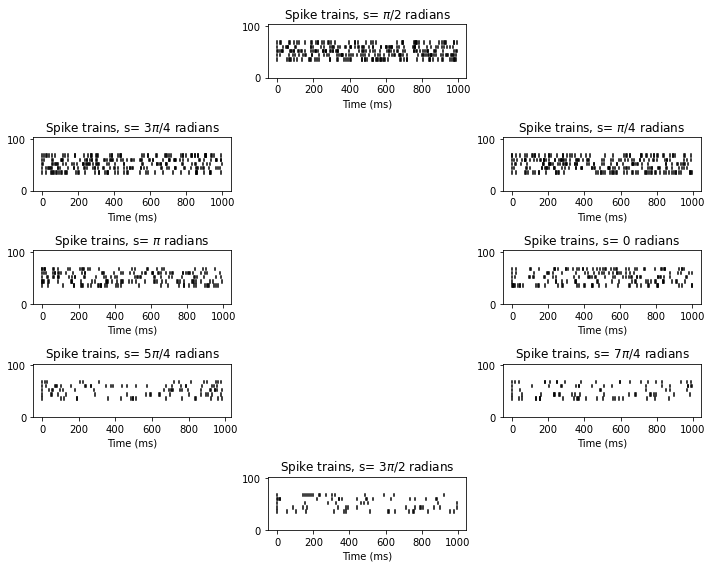

In [8]:
s_labels = ['0', '$\pi$/4', '$\pi$/2', '3$\pi$/4', '$\pi$', '5$\pi$/4', '3$\pi$/2', '7$\pi$/4']
num_plot_rows = 5
num_plot_cols = 3
subplot_indx = [9, 6, 2, 4, 7, 10, 14, 12]
num_rasters_to_plot = 5 # per condition

# Generate and plot homogeneous Poisson process spike trains
plt.figure(figsize=(10,8))
for con in range(num_cons):

    # Plot spike rasters
    plt.subplot(num_plot_rows, num_plot_cols, subplot_indx[con])    
    nsp.PlotSpikeRaster(spike_times[con, 0:num_rasters_to_plot])
    
    plt.title('Spike trains, s= '+s_labels[con]+' radians')
    plt.tight_layout()
plt.savefig("test.png")


### Plotting the spike rasters.  
  
The following code plot 5 spike trains for each reaching angle in the same format as shown in Figure 1.6(A) in *TN*. You should take a look at this code to understand what it's doing.  You may also want to look at the `PlotSpikeRaster` function from `nsp`.  

The plots should make intuitive sense given the tuning parameters.

### (b) (5 points) Plot spike histograms

For each reaching angle, find the spike histogram by taking spike counts in non-overlapping 20 ms bins, then averaging across the 100 trials.  Plot the 8 resulting spike histograms around a circle, as in part (a).  This time, as we'll allow you to represent the data as you like, you will have to also plot each histogram on your own.  The spike histograms should have firing rate (in spikes / second) as the vertical axis and time (in msec, not time bin index) as the horizontal axis.  

Suggestion: you can use plt.bar to plot the histogram, it is important to set the `width` for this function, e.g. width = 12. 

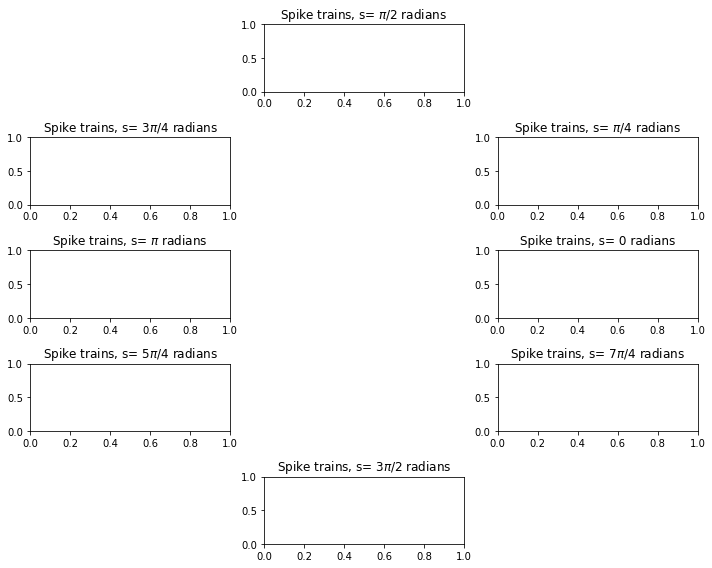

In [9]:
## 2b

plt.figure(figsize=(10,8))

for con in range(num_cons):
    plt.subplot(num_plot_rows,num_plot_cols,subplot_indx[con])
    #====================================================#
    # YOUR CODE HERE:
    #   Generate and plot spike histogram for this condition
    #====================================================#
    pass

    #====================================================#
    # END YOUR CODE
    #====================================================#
    plt.title('Spike trains, s= '+s_labels[con]+' radians')
    plt.tight_layout()


### (c) (4 points)Tuning curve

For each trial, count the number of spikes across the entire trial. Plots these points on the axes like shown in Figure 1.6(B) in *TN*, where the x-axis is reach angle and the y-axis is firing rate. There should be 800 points in the plot (but some points may be on top of each other due to the discrete nature of spike counts).  For each reaching angle, find the mean firing rate across the 100 trials, and plot the mean firing rate using a red point on the same plot.  Now, plot the tuning curve of this neuron in green on the same plot.  
  

In [ ]:
## 2c    
spike_counts = np.zeros((num_cons, num_trials)) # each element in spike_counts is the total spike count for this reach direction and trial 
#====================================================#
# YOUR CODE HERE:
#   Plot the single trial spike counts and the tuning curve
#   on top of each other.
#====================================================#
pass

#====================================================#
# END YOUR CODE
#====================================================#
plt.xlabel('Reach angle (radians)')
plt.ylabel('Firing rate (spikes / second)')
plt.title('Simulated spike counts (blue)\n'+
           'mean simulated spike counts (red),and\n'+
           'cosine tuning curve used in simulation (green)')
plt.xlim(0, 2*np.pi)

#### Question: Do the mean firing rates lie near the tuning curve?

#### Your answer: 

### (d) (6 points) Count distribution
For each reaching angle, plot the *normalized* distribution
(i.e., normalized so that the area under the distribution equals
one) of spike counts (using the same counts from part (c)).  Plot
the 8 distributions around a circle, as in part (a).  Fit a Poisson
distribution to each empirical distribution and plot it on top of
the corresponding empirical distribution. 

Please plot the empirical distribution as well as the fit

In [ ]:
##2d

plt.figure(figsize=(10,8))
max_count = np.max(spike_counts)
spike_count_bin_centers =  np.arange(0,max_count,1)

for con in range(num_cons):
    plt.subplot(num_plot_rows,num_plot_cols,subplot_indx[con])
    
    #====================================================#
    # YOUR CODE HERE:
    #   Calculate the empirical mean for the Poisson spike
    #   counts, and then generate a curve reflecting the probability
    #   mass function of the Poisson distribution as a function
    #   of spike counts.
    #====================================================#
    pass
    
    #====================================================#
    # END YOUR CODE
    #====================================================#
    
    #====================================================#
    # YOUR CODE HERE:
    #   Plot the empirical count distribution, and on top of it 
    #   plot your fit Poisson distribution.
    #====================================================#
    pass

    #====================================================#
    # END YOUR CODE
    #====================================================#
    plt.xlim([0, max_count])
    plt.title('Count distribution, s= '+ s_labels[con]+' radians')
    plt.tight_layout()  


#### Question:  
Are the empirical distributions well-fit by Poisson distributions?

#### Your answer: 

### (e)(4 points) Fano factor
For each reaching angle, find the mean and variance of the spike 
counts across the 100 trials (using the same spike counts from part
(c)).  Plot the obtained mean and variance on the axes shown in
Figure 1.14(A) in *TN*.  There should be 8 points in this plot
-- one per reaching angle.  

In [ ]:
## 2e
#====================================================#
# YOUR CODE HERE:
#   Calculate and plot the mean and variance for each of
#   the 8 reaching conditions.  Mean should be on the 
#   x-axis and variance on the y-axis.
#====================================================#
pass

#====================================================#
# END YOUR CODE
#====================================================#



#### Question:
Do these points lie near the 45 deg diagonal, as would be expected of a Poisson distribution?

#### Your answer: 

### (f) (5 points) Interspike interval (ISI) distribution
For each reaching angle, plot the normalized distribution of
ISIs. Plot the 8 distributions around a circle, as in part (a).  Fit
an exponential distribution to each empirical distribution and plot
it on top of the corresponding empirical distribution.  

Please plot the empirical distribution as well as the fit

In [ ]:
## 2f
plt.figure(figsize=(10,8))

for con in range(num_cons) :
    plt.subplot(num_plot_rows,num_plot_cols,subplot_indx[con])

    
    #====================================================#
    # YOUR CODE HERE:
    #   Calculate the interspike interval (ISI) distribution
    #   by finding the empirical mean of the ISI's, which 
    #   is the inverse of the rate of the distribution.
    #====================================================#
    pass

    #====================================================#
    # END YOUR CODE
    #====================================================#  
    
    #====================================================#
    # YOUR CODE HERE:
    #   Plot Interspike interval (ISI) distribution
    #====================================================#
    pass

    #====================================================#
    # END YOUR CODE
    #====================================================#   
    plt.title('ISI distribution, s= '+ s_labels[con]+' radians')
    plt.tight_layout() 

#### Question:
Are the empirical distributions well-fit by exponential distributions?

#### Your answer:

### (g) (5 points) Coefficient of variation ($C_V$)
  For each reaching angle, find the average ISI and $C_V$ of the ISIs.
  Plot the resulting values on the axes shown in Figure 1.16 in
  *TN*.  There should be 8 points in this plot.  


In [ ]:
#2g
#====================================================#
# YOUR CODE HERE:
# Calculate and plot coeffcient of variation
#====================================================#
pass

#====================================================#
# END YOUR CODE
#====================================================#

#### Question: 
Do the $C_V$ values lie near unity, as would be expected of a Poisson process?

#### Your answer: